In [30]:
import pint.toa as toa
import pint.models as models
import pint.residuals as r
import pint.fitter as fit

import matplotlib.pyplot as plt

import astropy.units as u

In [42]:
t = toa.get_TOAs("./datafiles/PvT/B1112+50_test_t2.tim", usepickle=False)

INFO: No pulse numbers found in the TOAs [pint.toa]
INFO: Applying clock corrections (include_GPS = True, include_BIPM = True. [pint.toa]
INFO: Evaluating observatory clock corrections. [pint.observatory.topo_obs]
INFO: Applying GPS to UTC clock correction (~few nanoseconds) [pint.observatory.topo_obs]
INFO: Applying TT(TAI) to TT(BIPM) clock correction (~27 us) [pint.observatory.topo_obs]
INFO: Computing TDB columns. [pint.toa]
INFO: Doing astropy mode TDB conversion [pint.observatory]
INFO: Computing positions and velocities of observatories and Earth (planets = False), using DE421 ephemeris [pint.toa]


In [43]:
t.print_summary()

Number of TOAs:  132
Number of commands:  1
Number of observatories:  1 ['prao']
MJD span:  58139.983 to 58503.986
prao TOAs (132):
  Min error:     20.6 us
  Max error:     314 us
  Mean error:    86.2 us
  Median error:  77.5 us
  Error stddev:  48.1 us



In [44]:
m = models.get_model("./datafiles/1112.par")

In [45]:
print(m.as_parfile())

PSR                              J1112+50
RAJ                     11:15:38.40000000 1 0.00000000000000000000
DECJ                    50:30:12.29000000 1 0.00000000000000000000
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
F0                        0.6037044172606 1 0.0
F1                           -9.08518e-16 1 0.0
PEPOCH             49334.0000000000000000
PLANET_SHAPIRO                          N
DM                                    9.0
DM1                                   0.0



In [46]:
ds = m.delay(t)

Text(0, 0.5, 'Delay ($\\mu$s)')

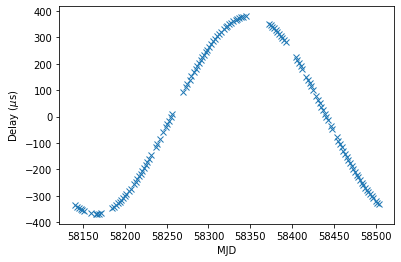

In [47]:
plt.plot(t.get_mjds(high_precision=False), ds, "x")
plt.xlabel("MJD")
plt.ylabel("Delay ($\mu$s)")

In [48]:
rs = r.Residuals(t, m)

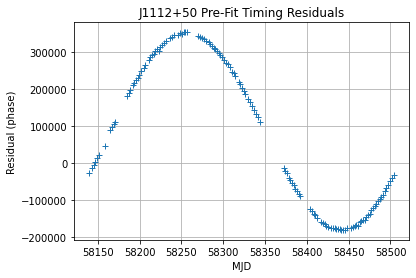

In [49]:
plt.plot( rs.toas.get_mjds(), rs.time_resids.to(u.us), '+')
plt.title("%s Pre-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [50]:
f = fit.WLSFitter(t, m)
f.fit_toas()

<Quantity 179770.91647491>

In [51]:

print(
    "Best fit has reduced chi^2 of {:.3f} ({} dof)".format(
        f.resids.chi2_reduced, f.resids.dof
    )
)
# Notice that the residuals have units, since they are astropy Quantities
print("RMS in phase is", f.resids.phase_resids.std())
print("RMS in time is", f.resids.time_resids.std().to(u.us))
print("\n Best model is:")
print(f.model.as_parfile())

Best fit has reduced chi^2 of 1404.460 (128 dof)
RMS in phase is 0.00153948616121598 cycle
RMS in time is 2550.066044715775 us

 Best model is:
PSR                              J1112+50
RAJ                     11:15:28.40226760 1 0.00000031983066004112
DECJ                    50:31:07.35196786 1 0.00000324253955927280
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
F0                 0.60370442734457413616 1 2.1777456490664897769e-10
F1              -9.213993618281368093e-16 1 2.8020963966299115306e-19
PEPOCH             49334.0000000000000000
PLANET_SHAPIRO                          N
DM                                    9.0
DM1                                   0.0



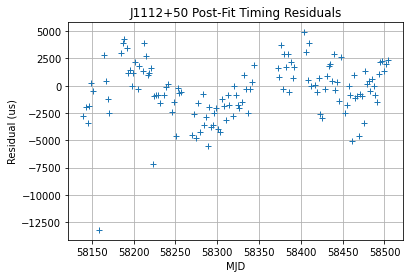

In [52]:
plt.plot(
    t.get_mjds(), f.resids.time_resids.to(u.us), '+')
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

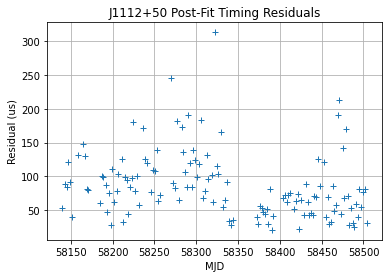

In [53]:
plt.plot(
    t.get_mjds(), t.get_errors(), '+')
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

In [55]:
print(f.model.as_parfile())

PSR                              J1112+50
RAJ                     11:15:28.40226760 1 0.00000031983066004112
DECJ                    50:31:07.35196786 1 0.00000324253955927280
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
F0                 0.60370442734457413616 1 2.1777456490664897769e-10
F1              -9.213993618281368093e-16 1 2.8020963966299115306e-19
PEPOCH             49334.0000000000000000
PLANET_SHAPIRO                          N
DM                                    9.0
DM1                                   0.0



In [57]:
%%time
f = fit.WLSFitter(t, m)
f.fit_toas()

CPU times: user 306 ms, sys: 0 ns, total: 306 ms
Wall time: 308 ms


<Quantity 179770.91647491>

In [58]:
27/60

0.45